In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('Taxi_Trips.csv')

In [28]:
temp4 = df[df["Trip Total"] > 100]["Trip Total"]

In [29]:
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,ffda52832eb92a9f45912ed313b7a7c2b9e55c85,58c784c628cc2b0b77468e6a406acea729301abbc17a62...,10/1/19 0:15,10/1/19 0:30,960.0,0.30,NaN,NaN,22.0,24.0,...,1.0,18.75,Cash,Taxi Affiliation Services,41.922761,-87.699155,POINT (-87.6991553432 41.9227606205),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
1,fb7a33cad1a7eb4e22f59c77384d6953720e03b2,45f287473a05c64ef70c6a64af2b317c3cec01353eaaa2...,10/1/19 0:15,10/1/19 0:45,1546.0,19.20,NaN,NaN,76.0,33.0,...,4.0,61.50,Mobile,Setare Inc,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.857184,-87.620335,POINT (-87.6203346241 41.8571838585)
2,f73de6c071ce6e4764a846308336598f43d91f60,9b6ede7d36f53ba56a1ec8882cc17703224ac426ba9ef9...,10/1/19 0:15,10/1/19 0:30,840.0,3.90,NaN,NaN,24.0,6.0,...,0.0,13.25,Cash,Star North Management LLC,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
3,f7f5e5e257189c830bf7c2b4a1ad611c8cb8e9de,9b27e88e4aaf1baf7c5258a585aa5fb93156885a6e973f...,10/1/19 0:15,10/1/19 0:30,1229.0,10.39,NaN,NaN,76.0,NaN,...,7.0,34.75,Cash,Flash Cab,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
4,f69d21d02af9d1cdfec20726cf23a7a78cbd7c14,70bf7d4596f2cb1e28077895f272ce60c503eeeaa98208...,10/1/19 0:15,10/1/19 0:15,421.0,1.65,NaN,NaN,4.0,13.0,...,0.0,7.00,Cash,Flash Cab,41.975171,-87.687516,POINT (-87.6875155152 41.9751709433),41.983636,-87.723583,POINT (-87.7235831853 41.9836363072)


In [30]:
df = df[["Trip Start Timestamp","Trip End Timestamp","Trip Seconds","Trip Miles","Fare","Tips","Tolls","Extras","Trip Total","Company","Pickup Centroid Latitude","Pickup Centroid Longitude","Dropoff Centroid Latitude","Dropoff Centroid Longitude"]]

In [31]:
df.head()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
0,10/1/19 0:15,10/1/19 0:30,960.0,0.30,17.75,0.00,0.0,1.0,18.75,Taxi Affiliation Services,41.922761,-87.699155,41.901207,-87.676356
1,10/1/19 0:15,10/1/19 0:45,1546.0,19.20,47.25,10.25,0.0,4.0,61.50,Setare Inc,41.980264,-87.913625,41.857184,-87.620335
2,10/1/19 0:15,10/1/19 0:30,840.0,3.90,13.25,0.00,0.0,0.0,13.25,Star North Management LLC,41.901207,-87.676356,41.944227,-87.655998
3,10/1/19 0:15,10/1/19 0:30,1229.0,10.39,27.75,0.00,0.0,7.0,34.75,Flash Cab,41.980264,-87.913625,NaN,NaN
4,10/1/19 0:15,10/1/19 0:15,421.0,1.65,7.00,0.00,0.0,0.0,7.00,Flash Cab,41.975171,-87.687516,41.983636,-87.723583


In [32]:
df.shape

(1048575, 14)

In [33]:
dropped = df.dropna()

In [34]:
dropped.shape

(939030, 14)

In [35]:
dropped['Extras'] = dropped['Extras'].astype(float)


/Users/brucesun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
toll_zero = dropped[dropped["Tolls"] == 0]
toll_zero = toll_zero[["Trip Start Timestamp","Trip Seconds","Trip Miles","Fare","Tips","Extras","Trip Total","Company","Pickup Centroid Latitude","Pickup Centroid Longitude","Dropoff Centroid Latitude","Dropoff Centroid Longitude"]]

In [37]:
toll_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938935 entries, 0 to 1048574
Data columns (total 12 columns):
Trip Start Timestamp          938935 non-null object
Trip Seconds                  938935 non-null float64
Trip Miles                    938935 non-null float64
Fare                          938935 non-null float64
Tips                          938935 non-null float64
Extras                        938935 non-null float64
Trip Total                    938935 non-null float64
Company                       938935 non-null object
Pickup Centroid Latitude      938935 non-null float64
Pickup Centroid Longitude     938935 non-null float64
Dropoff Centroid Latitude     938935 non-null float64
Dropoff Centroid Longitude    938935 non-null float64
dtypes: float64(10), object(2)
memory usage: 93.1+ MB


In [38]:
#toll_zero["Fare"] = toll_zero["Fare"].astype(float)
#toll_zero["Trip Seconds"] = toll_zero["Trip Seconds"].astype(float)
#toll_zero["Trip Total"] = toll_zero["Trip Total"].astype(float)
toll_zero["Company"] = toll_zero["Company"].astype(str)
toll_zero["Pickup Centroid Latitude"] = toll_zero["Pickup Centroid Latitude"].astype(float)

In [39]:
toll_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938935 entries, 0 to 1048574
Data columns (total 12 columns):
Trip Start Timestamp          938935 non-null object
Trip Seconds                  938935 non-null float64
Trip Miles                    938935 non-null float64
Fare                          938935 non-null float64
Tips                          938935 non-null float64
Extras                        938935 non-null float64
Trip Total                    938935 non-null float64
Company                       938935 non-null object
Pickup Centroid Latitude      938935 non-null float64
Pickup Centroid Longitude     938935 non-null float64
Dropoff Centroid Latitude     938935 non-null float64
Dropoff Centroid Longitude    938935 non-null float64
dtypes: float64(10), object(2)
memory usage: 93.1+ MB


In [40]:
check_time = toll_zero[['Trip Start Timestamp',"Trip Total",'Trip Miles','Trip Seconds']]
check_time['hour'] = check_time['Trip Start Timestamp']
print(check_time.shape)
check_time = check_time[check_time['Trip Miles']>0]
print(check_time.shape)
check_time = check_time[check_time['Trip Seconds']>0]
print(check_time.shape)
check_time['perSeconds'] = check_time["Trip Total"]/check_time['Trip Seconds']
check_time['perMiles'] = check_time["Trip Total"]/check_time['Trip Miles']

/Users/brucesun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(938935, 5)
(800372, 5)
(799552, 5)


In [41]:

def extract_hour(time):
    lst1 = time.split(" ")
    lst2 = lst1[1].split(":")
    hour = int(lst2[0])
    return hour
check_time['hour'] = check_time['hour'].apply(lambda x: extract_hour(x))
check_time.head()

,Trip Start Timestamp,Trip Total,Trip Miles,Trip Seconds,hour,perSeconds,perMiles
0,10/1/19 0:15,18.75,0.30,960.0,0,0.019531,62.500000
1,10/1/19 0:15,61.50,19.20,1546.0,0,0.039780,3.203125
2,10/1/19 0:15,13.25,3.90,840.0,0,0.015774,3.397436
4,10/1/19 0:15,7.00,1.65,421.0,0,0.016627,4.242424
5,10/1/19 0:15,11.50,0.20,600.0,0,0.019167,57.500000


In [42]:
res =pd.DataFrame()

In [43]:
res["count"] = check_time.groupby('hour').count().reset_index()["Trip Total"]
res["sum_total"] = check_time.groupby('hour').sum().reset_index()["Trip Total"]
res["perSeconds"] = check_time.groupby('hour').sum().reset_index()["perSeconds"]
res["perMiles"] = check_time.groupby('hour').sum().reset_index()["perMiles"]

In [44]:
res["total_average"] = res["sum_total"]/res["count"]
res["miles_average"] = res["perMiles"]/res["count"]
res["second_average"] = res["perSeconds"]/res["count"]
#res.head()

In [45]:
res = res[["total_average","miles_average","second_average"]]
res

,total_average,miles_average,second_average
0,17.439658,14.658278,0.026101
1,15.584149,14.805892,0.026976
2,13.679259,16.359424,0.027201
3,14.401731,16.921372,0.027584
4,20.271367,16.660675,0.029476
5,28.693385,12.683005,0.028455
6,24.700772,11.231706,0.026348
7,17.950232,12.109253,0.023695
8,15.772225,11.118638,0.019742
9,17.084368,12.051333,0.020268


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'second_average')

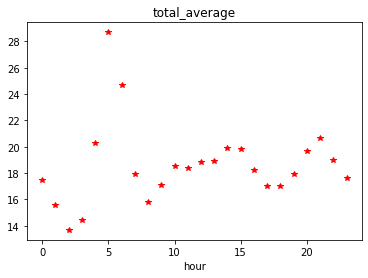

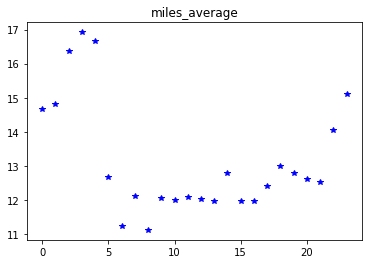

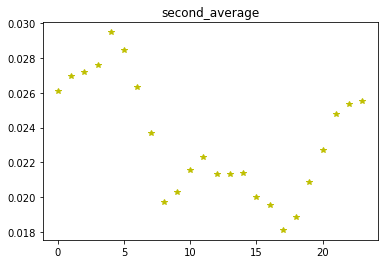

In [47]:
plt.figure(1)
plt.plot(res["total_average"],'r*')
plt.title("total_average")
plt.xlabel("hour")
plt.figure(2)
plt.plot(res["miles_average"],'b*')
plt.title("miles_average")
plt.figure(3)
plt.plot(res["second_average"],'y*')
plt.title("second_average")

In [185]:
def extract_period(time):
    lst1 = time.split(" ")
    lst2 = lst1[1].split(":")
    hour = int(lst2[0])
    if hour <= 4 or hour >= 22:
        return 1
    else:
        return 0
    return hour

In [186]:
cleaned_df = toll_zero
cleaned_df['mid_night'] = toll_zero['Trip Start Timestamp'].apply(lambda x: extract_period(x))
cleaned_df['non_mid_night'] = cleaned_df['mid_night'].apply(lambda x: 1-x)
cleaned_df.head()

,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Extras,Trip Total,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,mid_night,non_mid_night
0,10/1/19 0:15,960.0,0.30,17.75,0.00,1.0,18.75,Taxi Affiliation Services,41.922761,-87.699155,41.901207,-87.676356,1,0
1,10/1/19 0:15,1546.0,19.20,47.25,10.25,4.0,61.50,Setare Inc,41.980264,-87.913625,41.857184,-87.620335,1,0
2,10/1/19 0:15,840.0,3.90,13.25,0.00,0.0,13.25,Star North Management LLC,41.901207,-87.676356,41.944227,-87.655998,1,0
4,10/1/19 0:15,421.0,1.65,7.00,0.00,0.0,7.00,Flash Cab,41.975171,-87.687516,41.983636,-87.723583,1,0
5,10/1/19 0:15,600.0,0.20,11.50,0.00,0.0,11.50,Taxi Affiliation Services,41.899602,-87.633308,41.857184,-87.620335,1,0


In [187]:
cleaned_df.to_csv("cleaned.csv",index = False)

In [188]:
new_df = pd.read_csv('cleaned.csv')

In [189]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938935 entries, 0 to 938934
Data columns (total 14 columns):
Trip Start Timestamp          938935 non-null object
Trip Seconds                  938935 non-null float64
Trip Miles                    938935 non-null float64
Fare                          938935 non-null float64
Tips                          938935 non-null float64
Extras                        938935 non-null float64
Trip Total                    938935 non-null float64
Company                       938935 non-null object
Pickup Centroid Latitude      938935 non-null float64
Pickup Centroid Longitude     938935 non-null float64
Dropoff Centroid Latitude     938935 non-null float64
Dropoff Centroid Longitude    938935 non-null float64
mid_night                     938935 non-null int64
non_mid_night                 938935 non-null int64
dtypes: float64(10), int64(2), object(2)
memory usage: 100.3+ MB


In [190]:
new_df.head()

,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Extras,Trip Total,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,mid_night,non_mid_night
0,10/1/19 0:15,960.0,0.30,17.75,0.00,1.0,18.75,Taxi Affiliation Services,41.922761,-87.699155,41.901207,-87.676356,1,0
1,10/1/19 0:15,1546.0,19.20,47.25,10.25,4.0,61.50,Setare Inc,41.980264,-87.913625,41.857184,-87.620335,1,0
2,10/1/19 0:15,840.0,3.90,13.25,0.00,0.0,13.25,Star North Management LLC,41.901207,-87.676356,41.944227,-87.655998,1,0
3,10/1/19 0:15,421.0,1.65,7.00,0.00,0.0,7.00,Flash Cab,41.975171,-87.687516,41.983636,-87.723583,1,0
4,10/1/19 0:15,600.0,0.20,11.50,0.00,0.0,11.50,Taxi Affiliation Services,41.899602,-87.633308,41.857184,-87.620335,1,0


In [191]:
temp_df = new_df.groupby('Company')['Fare'].sum()#.reset_index()
temp1 = new_df[new_df["Trip Seconds"]>0]
temp2 = temp1[temp1["Trip Miles"]>0]

In [192]:
temp2.to_csv("time_mile_not_zero.csv",index = False)

In [193]:
temp2.head()

,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Extras,Trip Total,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,mid_night,non_mid_night
0,10/1/19 0:15,960.0,0.30,17.75,0.00,1.0,18.75,Taxi Affiliation Services,41.922761,-87.699155,41.901207,-87.676356,1,0
1,10/1/19 0:15,1546.0,19.20,47.25,10.25,4.0,61.50,Setare Inc,41.980264,-87.913625,41.857184,-87.620335,1,0
2,10/1/19 0:15,840.0,3.90,13.25,0.00,0.0,13.25,Star North Management LLC,41.901207,-87.676356,41.944227,-87.655998,1,0
3,10/1/19 0:15,421.0,1.65,7.00,0.00,0.0,7.00,Flash Cab,41.975171,-87.687516,41.983636,-87.723583,1,0
4,10/1/19 0:15,600.0,0.20,11.50,0.00,0.0,11.50,Taxi Affiliation Services,41.899602,-87.633308,41.857184,-87.620335,1,0


In [194]:
temp2['per_min'] = temp2['Fare']/temp2['Trip Seconds'] * 60

/Users/brucesun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
#temp3 = temp2.groupby(['Company']).mean().reset_index()

In [30]:
#temp3[['Company','per_min']].values

In [31]:
# qqq = (temp3[['per_min']].values).T
# qqq.sort()

In [32]:
# qqq[:,0:-1]

In [33]:
# import matplotlib.pyplot as plt

In [34]:
# plt.plot(qqq[:,0:-1].T)

In [195]:
temp3 = temp2.groupby(['Company']).count().reset_index()
temp3

,Company,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,mid_night,non_mid_night,per_min
0,1085 - 72312 N and W Cab Co,265,265,265,265,265,265,265,265,265,265,265,265,265,265
1,2092 - 61288 Sbeih company,224,224,224,224,224,224,224,224,224,224,224,224,224,224
2,24 Seven Taxi,8666,8666,8666,8666,8666,8666,8666,8666,8666,8666,8666,8666,8666,8666
3,2733 - 74600 Benny Jona,99,99,99,99,99,99,99,99,99,99,99,99,99,99
4,3011 - 66308 JBL Cab Inc.,379,379,379,379,379,379,379,379,379,379,379,379,379,379
5,3094 - 24059 G.L.B. Cab Co,265,265,265,265,265,265,265,265,265,265,265,265,265,265
6,312 Medallion Management Corp,966,966,966,966,966,966,966,966,966,966,966,966,966,966
7,3556 - 36214 RC Andrews Cab,103,103,103,103,103,103,103,103,103,103,103,103,103,103
8,3591 - 63480 Chuks Cab,430,430,430,430,430,430,430,430,430,430,430,430,430,430
9,3620 - 52292 David K. Cab Corp.,85,85,85,85,85,85,85,85,85,85,85,85,85,85


In [196]:
temp3 = temp3.sort_values('Fare',ascending=False)
temp3 = temp3.reset_index()[["Company","Fare"]].rename(columns = {"Fare":"num_of_records"})

In [197]:
temp3

,Company,num_of_records
0,Taxi Affiliation Services,159024
1,Flash Cab,130524
2,Chicago Carriage Cab Corp,100582
3,Sun Taxi,73094
4,Medallion Leasin,68076
5,City Service,65283
6,Star North Management LLC,47949
7,"Taxicab Insurance Agency, LLC",22337
8,Choice Taxi Association,22284
9,Nova Taxi Affiliation Llc,18521


In [198]:
sum(temp3[7:]['num_of_records'])

155020

In [199]:
def combine_company(string):
    strings = set(['Taxi Affiliation Services','Flash Cab','Chicago Carriage Cab Corp','Sun Taxi','Medallion Leasin','City Service','Star North Management LLC'])
    if string not in strings:
        return "Others"
    return string

In [200]:
temp2.head(5)

,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Extras,Trip Total,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,mid_night,non_mid_night,per_min
0,10/1/19 0:15,960.0,0.30,17.75,0.00,1.0,18.75,Taxi Affiliation Services,41.922761,-87.699155,41.901207,-87.676356,1,0,1.109375
1,10/1/19 0:15,1546.0,19.20,47.25,10.25,4.0,61.50,Setare Inc,41.980264,-87.913625,41.857184,-87.620335,1,0,1.833765
2,10/1/19 0:15,840.0,3.90,13.25,0.00,0.0,13.25,Star North Management LLC,41.901207,-87.676356,41.944227,-87.655998,1,0,0.946429
3,10/1/19 0:15,421.0,1.65,7.00,0.00,0.0,7.00,Flash Cab,41.975171,-87.687516,41.983636,-87.723583,1,0,0.997625
4,10/1/19 0:15,600.0,0.20,11.50,0.00,0.0,11.50,Taxi Affiliation Services,41.899602,-87.633308,41.857184,-87.620335,1,0,1.150000


In [201]:
temp2['Company'] = temp2['Company'].apply(lambda x: combine_company(x))

/Users/brucesun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [202]:
temp2.head(5)

,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Extras,Trip Total,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,mid_night,non_mid_night,per_min
0,10/1/19 0:15,960.0,0.30,17.75,0.00,1.0,18.75,Taxi Affiliation Services,41.922761,-87.699155,41.901207,-87.676356,1,0,1.109375
1,10/1/19 0:15,1546.0,19.20,47.25,10.25,4.0,61.50,Others,41.980264,-87.913625,41.857184,-87.620335,1,0,1.833765
2,10/1/19 0:15,840.0,3.90,13.25,0.00,0.0,13.25,Star North Management LLC,41.901207,-87.676356,41.944227,-87.655998,1,0,0.946429
3,10/1/19 0:15,421.0,1.65,7.00,0.00,0.0,7.00,Flash Cab,41.975171,-87.687516,41.983636,-87.723583,1,0,0.997625
4,10/1/19 0:15,600.0,0.20,11.50,0.00,0.0,11.50,Taxi Affiliation Services,41.899602,-87.633308,41.857184,-87.620335,1,0,1.150000


In [203]:
temp2.to_csv("combined_companies.csv",index = False)

# One hot coding to process company names

In [7]:
df = pd.read_csv('combined_companies.csv')
df = df.drop(columns="non_mid_night")
df = df.drop(columns="Fare")

In [8]:
df.head(5)

,Trip Start Timestamp,Trip Seconds,Trip Miles,Tips,Extras,Trip Total,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,mid_night,per_min
0,10/1/19 0:15,960.0,0.30,0.00,1.0,18.75,Taxi Affiliation Services,41.922761,-87.699155,41.901207,-87.676356,1,1.109375
1,10/1/19 0:15,1546.0,19.20,10.25,4.0,61.50,Others,41.980264,-87.913625,41.857184,-87.620335,1,1.833765
2,10/1/19 0:15,840.0,3.90,0.00,0.0,13.25,Star North Management LLC,41.901207,-87.676356,41.944227,-87.655998,1,0.946429
3,10/1/19 0:15,421.0,1.65,0.00,0.0,7.00,Flash Cab,41.975171,-87.687516,41.983636,-87.723583,1,0.997625
4,10/1/19 0:15,600.0,0.20,0.00,0.0,11.50,Taxi Affiliation Services,41.899602,-87.633308,41.857184,-87.620335,1,1.150000


In [9]:
lst = ['Taxi Affiliation Services','Flash Cab','Chicago Carriage Cab Corp','Sun Taxi','Medallion Leasin','City Service','Star North Management LLC','Others']
for i in range(len(lst)):
    df[i] = lst[i]
df.head(5)

,Trip Start Timestamp,Trip Seconds,Trip Miles,Tips,Extras,Trip Total,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,...,mid_night,per_min,0,1,2,3,4,5,6,7
0,10/1/19 0:15,960.0,0.30,0.00,1.0,18.75,Taxi Affiliation Services,41.922761,-87.699155,41.901207,...,1,1.109375,Taxi Affiliation Services,Flash Cab,Chicago Carriage Cab Corp,Sun Taxi,Medallion Leasin,City Service,Star North Management LLC,Others
1,10/1/19 0:15,1546.0,19.20,10.25,4.0,61.50,Others,41.980264,-87.913625,41.857184,...,1,1.833765,Taxi Affiliation Services,Flash Cab,Chicago Carriage Cab Corp,Sun Taxi,Medallion Leasin,City Service,Star North Management LLC,Others
2,10/1/19 0:15,840.0,3.90,0.00,0.0,13.25,Star North Management LLC,41.901207,-87.676356,41.944227,...,1,0.946429,Taxi Affiliation Services,Flash Cab,Chicago Carriage Cab Corp,Sun Taxi,Medallion Leasin,City Service,Star North Management LLC,Others
3,10/1/19 0:15,421.0,1.65,0.00,0.0,7.00,Flash Cab,41.975171,-87.687516,41.983636,...,1,0.997625,Taxi Affiliation Services,Flash Cab,Chicago Carriage Cab Corp,Sun Taxi,Medallion Leasin,City Service,Star North Management LLC,Others
4,10/1/19 0:15,600.0,0.20,0.00,0.0,11.50,Taxi Affiliation Services,41.899602,-87.633308,41.857184,...,1,1.150000,Taxi Affiliation Services,Flash Cab,Chicago Carriage Cab Corp,Sun Taxi,Medallion Leasin,City Service,Star North Management LLC,Others


In [10]:
def bool_to_onehot(boolean):
    if boolean == True:
        return 1
    elif boolean == False:
        return 0

In [11]:
for i in range(len(lst)):
    df[lst[i]] =(df["Company"] == df[i])
    df[lst[i]] = df[lst[i]].apply(lambda x: bool_to_onehot(x))
    

In [12]:
df.head()

,Trip Start Timestamp,Trip Seconds,Trip Miles,Tips,Extras,Trip Total,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,...,6,7,Taxi Affiliation Services,Flash Cab,Chicago Carriage Cab Corp,Sun Taxi,Medallion Leasin,City Service,Star North Management LLC,Others
0,10/1/19 0:15,960.0,0.30,0.00,1.0,18.75,Taxi Affiliation Services,41.922761,-87.699155,41.901207,...,Star North Management LLC,Others,1,0,0,0,0,0,0,0
1,10/1/19 0:15,1546.0,19.20,10.25,4.0,61.50,Others,41.980264,-87.913625,41.857184,...,Star North Management LLC,Others,0,0,0,0,0,0,0,1
2,10/1/19 0:15,840.0,3.90,0.00,0.0,13.25,Star North Management LLC,41.901207,-87.676356,41.944227,...,Star North Management LLC,Others,0,0,0,0,0,0,1,0
3,10/1/19 0:15,421.0,1.65,0.00,0.0,7.00,Flash Cab,41.975171,-87.687516,41.983636,...,Star North Management LLC,Others,0,1,0,0,0,0,0,0
4,10/1/19 0:15,600.0,0.20,0.00,0.0,11.50,Taxi Affiliation Services,41.899602,-87.633308,41.857184,...,Star North Management LLC,Others,1,0,0,0,0,0,0,0


In [14]:
one_hot = df[['Trip Seconds', 'Trip Miles','Tips', 'Extras', 'Trip Total','mid_night', 'Taxi Affiliation Services', 'Flash Cab', 'Chicago Carriage Cab Corp', 'Sun Taxi', 'Medallion Leasin', 'City Service', 'Star North Management LLC', 'Others']]
             

In [15]:
one_hot.head(5)

,Trip Seconds,Trip Miles,Tips,Extras,Trip Total,mid_night,Taxi Affiliation Services,Flash Cab,Chicago Carriage Cab Corp,Sun Taxi,Medallion Leasin,City Service,Star North Management LLC,Others
0,960.0,0.30,0.00,1.0,18.75,1,1,0,0,0,0,0,0,0
1,1546.0,19.20,10.25,4.0,61.50,1,0,0,0,0,0,0,0,1
2,840.0,3.90,0.00,0.0,13.25,1,0,0,0,0,0,0,1,0
3,421.0,1.65,0.00,0.0,7.00,1,0,1,0,0,0,0,0,0
4,600.0,0.20,0.00,0.0,11.50,1,1,0,0,0,0,0,0,0


In [213]:
one_hot.to_csv("one_hot.csv",index = False)

# Training and tesing data generation

In [19]:
import random

In [20]:
ori_data = pd.read_csv('one_hot.csv')
ori_data.head()

,Trip Seconds,Trip Miles,Tips,Extras,Trip Total,mid_night,Taxi Affiliation Services,Flash Cab,Chicago Carriage Cab Corp,Sun Taxi,Medallion Leasin,City Service,Star North Management LLC,Others
0,960,0.30,0.00,1.0,18.75,1,1,0,0,0,0,0,0,0
1,1546,19.20,10.25,4.0,61.50,1,0,0,0,0,0,0,0,1
2,840,3.90,0.00,0.0,13.25,1,0,0,0,0,0,0,1,0
3,421,1.65,0.00,0.0,7.00,1,0,1,0,0,0,0,0,0
4,600,0.20,0.00,0.0,11.50,1,1,0,0,0,0,0,0,0


In [21]:
ori_data['rank'] = 0

In [22]:
ori_data['rank'] = ori_data['rank'].apply(lambda x:random.uniform(1, 10))

In [23]:
ori_data = ori_data.sort_values('rank').reset_index()
ori_data.head(10)

,index,Trip Seconds,Trip Miles,Tips,Extras,Trip Total,mid_night,Taxi Affiliation Services,Flash Cab,Chicago Carriage Cab Corp,Sun Taxi,Medallion Leasin,City Service,Star North Management LLC,Others,rank
0,767459,372,1.35,4.00,0.0,11.00,0,0,0,1,0,0,0,0,0,1.000001
1,201985,2684,17.71,12.19,4.0,60.94,0,0,1,0,0,0,0,0,0,1.000008
2,55083,693,1.35,0.00,0.0,8.25,0,0,0,0,1,0,0,0,0,1.000033
3,733302,1468,15.78,8.00,5.0,53.50,1,0,0,1,0,0,0,0,0,1.000042
4,311212,240,0.50,3.00,0.0,8.00,0,0,0,0,0,0,0,0,1,1.000057
5,698128,780,3.80,1.50,0.0,14.75,1,1,0,0,0,0,0,0,0,1.000062
6,270846,480,5.20,0.00,0.0,15.25,1,1,0,0,0,0,0,0,0,1.000064
7,435232,840,5.10,3.60,1.5,21.10,0,0,0,0,0,0,0,0,1,1.000067
8,602462,720,3.80,3.35,0.0,16.35,1,1,0,0,0,0,0,0,0,1.000081
9,791837,300,1.10,2.00,0.0,8.25,0,0,0,0,0,0,0,1,0,1.000105


In [24]:
ori_data = ori_data[['Trip Seconds', 'Trip Miles', 'Tips', 'Extras', 'Trip Total', 'mid_night', 'Taxi Affiliation Services', 'Flash Cab', 'Chicago Carriage Cab Corp', 'Sun Taxi', 'Medallion Leasin', 'City Service', 'Star North Management LLC', 'Others']]
# the scale of training vs testing is 3:1
#devide the training dataset into 5 parts for cross-validation,so it would be 15:5
step = len(ori_data)//20 
step

39977

In [25]:
train1_df = ori_data[:step*3]
train2_df = ori_data[step*3+1:step*6+1]
train3_df = ori_data[step*6+1:step*9+1]
train4_df = ori_data[step*9+1:step*12+1]
train5_df = ori_data[step*12+1:step*15+1]
test_df = ori_data[step*15+1:]
print(train1_df.shape)
print(train2_df.shape)
print(train3_df.shape)
print(train4_df.shape)
print(train5_df.shape)
print(test_df.shape)

(119931, 14)
(119931, 14)
(119931, 14)
(119931, 14)
(119931, 14)
(199896, 14)


In [229]:
train1_df.to_csv("all_features/train1.csv",index = False)
train2_df.to_csv("all_features/train2.csv",index = False)
train3_df.to_csv("all_features/train3.csv",index = False)
train4_df.to_csv("all_features/train4.csv",index = False)
train5_df.to_csv("all_features/train5.csv",index = False)
test_df.to_csv("all_features/test.csv",index = False)